## Basic Setup

Run the cells below for the basic setup of this notebook.

In [2]:
try:
    from google.colab import drive # type: ignore
    IN_COLAB = True
except:
    IN_COLAB = False
    print('No colab environment, assuming local setup.')

if IN_COLAB:
    drive.mount('/content/drive')

    print('Connected COLAB to Google Drive.')

import os

base_folder = 'tensor_introduction'
control_folder = f'{'/Users/ronit/Desktop/MDST/tensor_introduction'}/control_values'

assert os.path.isdir(control_folder), 'Folder "control_values" not found, make sure that FOLDERNAME is set correctly.' if IN_COLAB else 'Folder "control_values" not found, make sure that your root folder is set correctly'

No colab environment, assuming local setup.


In [3]:
%matplotlib inline

In [6]:
import torch
import math
import torchvision
from torchvision import transforms
from matplotlib import pyplot as plt

In [12]:
torch.set_grad_enabled(False)

torch.autograd.grad_mode.set_grad_enabled(mode=False)

# Tensor Introduction

## Section 1: The Basics

A tensor is a multi-dimensional array of numerical values. A scalar (a number) is a 0th-order tensor, a vector is a 1st-order tensor, and a matrix is a 2nd-order tensor. Tensors of higher order extend this concept into additional dimensions. A colored image for example, is usually represented by a three-dimensional tensor of shape (3, H, W), where H and W are the height and width of  the image in pixels. You can think of this as three matrices stacked behind each other.

In this section, we want to cover the creation of tensors, basic pointwise operations and datatypes.

`torch.tensor()` is the most basic function to create tensors in pytorch. It takes a nested list as an argument and converts it to a tensor. The nested list must be in block shape already, a jagged list like [[5], [5,3]] can't be converted into a tensor.

In [13]:
A = None
B = None
C = None

# Example:
ex = torch.tensor([[1, 2, 3], [4, 6, 6]])
ex_shape = ex.shape
# ex:
# tensor([[1, 2, 3],
#         [4, 6, 6]])
# ex_shape: (2, 3)


##########################################################################
# TODO: Use torch.tensor() to create tensors of shape (5,),              #
#       (2,3) and (1, 2, 1).                                             #
##########################################################################

# Replace "pass" statement with your code
pass

##########################################################################
#               END OF YOUR CODE                                         #
##########################################################################

# End of your code

assert A.shape == (5,)
assert B.shape == (2,3)
assert C.shape == (1,2,1)

AttributeError: 'NoneType' object has no attribute 'shape'

There are two important methods that specifically create one-dimensional tensors: `torch.linspace` and `torch.arange`. `torch.linspace(start, end, steps)` creates evenly spaced values from `start` to `end`, including both `start` and `end`. `torch.arange` is usually used to create integers from 0 to N-1.


In [ ]:
A = None
B = None

# Example:
# ex1 = torch.linspace(0, 1, steps=5)
# ex1 is [0, 0.25, 0.5, 0.75, 1]
# ex2 = torch.arange(3)
# ex2 is [0, 1, 2]

##########################################################################
# TODO: Use the methods to create the following tensors:                 #
#   A = [-0.4, -0.2, 0, 0.2] and B = [0, 1, 2, 3, 4, 5]                  #
##########################################################################

# Replace "pass" statement with your code
pass

##########################################################################
#               END OF YOUR CODE                                         #
##########################################################################

assert torch.allclose(A, torch.tensor([-0.4, -0.2, 0, 0.2]))
assert torch.allclose(B, torch.tensor([0,1,2,3,4,5]))

Other important methods that are often used to create tensors are `torch.zeros`, `torch.ones`, and `torch.randn` (standard normal distribution) or `torch.rand` (uniform distribution on $[0, 1)$)

All of these methods take the shape of the tensor to be created as input.



In [ ]:
A = None
B = None
C = None

# Example:
# ex = torch.zeros((2, 2))
# tensor([[0., 0.],
#         [0., 0.]])

##########################################################################
# TODO: Use the methods to create:                                       #
# 1. zeros of shape (5, 3, 2)                                            #
# 2. fives of shape (100,) (use `torch.ones` and scale it)               #
# 3. standard normal distribution of shape (10, 10, 10)                  #
##########################################################################

# Replace "pass" statement with your code
pass

##########################################################################
#               END OF YOUR CODE                                         #
##########################################################################

assert A.shape == (5,3,2) and torch.allclose(A, torch.tensor([0.0]))
assert B.shape == (100,) and torch.allclose(B, torch.tensor([5.0]))
assert C.shape == (10,10,10)

You can use most basic operations like +, -, *, /, >, <, == on tensors of the same shape or, or on tensors and scalars.

In [ ]:
A = None
B = None
C = None

# Example:
# ex = torch.tensor([-1, 2, -3])
# ex_bool = ex < 0
# Result: torch.tensor([True, False, True])

##########################################################################
# TODO:                                                                  #
# 1. Try out + or *: Create a tensor A where each element is 384, by     #
#     creating to tensors A1 and A2 first (choose their values)          #
#     followed by A = A1 * A2, or A = A1 + A2. Choose any shape.         #
# 2. Create a linspace with 6 values between -0.6 and 0.3 and            #
#     compute which elements are smaller than -0.1.                      #
# 3. sample normally distributed values of shape (100,100,100) with      #
#     mean 0.5 and standard deviation 3.0 by scaling and adding          #
#     to the standard normal distribution `torch.randn(size)`.           #
##########################################################################

# Replace "pass" statement with your code
pass

##########################################################################
#               END OF YOUR CODE                                         #
##########################################################################

assert torch.allclose(A, torch.tensor([384.0]))
assert torch.all(B == torch.tensor([True, True, True, False, False, False]))
assert abs(C.std()-3.0)<0.05 and abs(C.mean() - 0.5) < 0.05

Tensors can have different datatypes. The most important ones for our project are `long` (`torch.int64`), `float` (`torch.float32`) and `bool` (`torch.bool`). We'll sometimes use `double` (`torch.float64`) for checks on your implementation. It's for floating point numbers like `float`, but with higher precision and more memory consumption.

You can cast a tensors with a syntax like `A.long()` or `A.to(torch.int64)`.

When converting from float to long (or to int), the decimal part is simply dropped. When converting from bool to float, True is converted to 1.0 and False to 0.0. When going from float or long to bool, non-zero values are interpreted as True, while zero values are interpreted as False.


In [ ]:
A = None
entry_count = None

##########################################################################
# TODO:                                                                  #
# 1. Create linspace(-2, 3, 5) and cast it to long.                      #
# 2. Sample uniform values of shape (100, 200, 50) and count how many    #
#     elements are smaller than 0.2. You can use torch.sum() to sum      #
#     all elements in a tensor.                                          #
##########################################################################

# Replace "pass" statement with your code
pass

##########################################################################
#               END OF YOUR CODE                                         #
##########################################################################

assert torch.all(A == torch.tensor([-2, 0, 0, 1, 3]))
assert abs(entry_count/(100*200*50) - 0.2) < 5e-3

## Section 2: Tensor Manipulation

### Understanding Shapes
The shape of a tensor is a tuple consisting of the size of each dimension. Tensors can be reshaped without changing the underlying data using functions like `torch.reshape()`, `torch.view()`, and `torch.transpose()`. `torch.reshape` and `torch.view` take the new shape of the tensor as argument, while `torch.transpose` takes the indices of the two dimension that you want to swap.

The difference between `view()`and `reshape()` is subtle. `view()` will always try to use the same underlying data and will throw an error if this is not possible, while `reshape()` will try to create a view, but will copy the data if it's not possible.

Use `torch.arange` and the new commands to create the desired outputs.

In [ ]:
A = None
B = None
C = None
correct_A = torch.tensor([
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [9, 10, 11],
])
correct_B = torch.tensor([
    [0, 1, 2, 3],
    [4, 5, 6, 7],
    [8, 9, 10, 11],
])
correct_C = torch.tensor([
    [0, 4, 8],
    [1,  5, 9],
    [2, 6, 10],
    [3, 7, 11],
])

##########################################################################
# TODO: Use reshape/view and transpose to construct the tensors above    #
#        from a linear torch.arange tensor.                              #
##########################################################################

# Replace "pass" statement with your code
pass

##########################################################################
#               END OF YOUR CODE                                         #
##########################################################################

assert torch.all(A == correct_A)
assert torch.all(B == correct_B)
assert torch.all(C == correct_C)

### Indexing and Slicing
Tensors support Python-like indexing to access elements, as well as more advanced slicing techniques to select ranges and sub-tensors.

Single Value Access: Use square brackets [] with an integer index to access a single element. The index starts from 0, where 0 refers to the first element.

Slicing a Sub-tensor: Extract a contiguous sub-tensor using a colon : to separate the starting and ending indices (exclusive of the ending index).  Omitting the starting index defaults to the beginning, and omitting the ending index defaults to the end.

Negative Indexing: Negative indices are supported, allowing you to index from the end of a dimension. For example, tensor[-1] refers to the last element in the tensor.

Newaxis (Adding Dimensions): Use None or newaxis to insert a new dimension of size 1 at a specific position in the indexing expression. This is useful for broadcasting operations.

Boolean Indexing:  You can use a boolean tensor (having the same shape as the tensor you want to index) as an index.  Elements where the boolean tensor has True are selected, and those corresponding to False are omitted in the result.



Use these indexing techniques to get the following values from the provided array:
* element at row with index 1, column with index 2 (use .item() to get the value instead of a 0-dimensional tensor)
* all elements in the row with index 1
* the last column (use negative indexing)
* the same array, but with an additional dimension 1 introduced between the row and column dimension and without the third column.
* a boolean mask representing all the values equal to 2
* a copy of the array, where all 2-values are set to -1

In [ ]:
A = torch.tensor([
        [3, 0, 1],
        [1, 1, 2],
        [2, 1, 0],
        [1, 1, 1]])

single_value = None
row = None
column = None
unsqueezed = None
mask = None
no_2s = None

##########################################################################
# TODO: Use indexing to retrieve the elements described above.           #
##########################################################################

# Replace "pass" statement with your code
pass

##########################################################################
#               END OF YOUR CODE                                         #
##########################################################################

assert single_value == 2
assert torch.all(row == torch.tensor([1,1,2]))
assert torch.all(column == torch.tensor([1,2,0,1]))
assert torch.all(unsqueezed == torch.tensor([[[3, 0]],[[1, 1]],[[2, 1]],[[1, 1]]]))
assert torch.all(mask == torch.tensor([[False, False, False],[False, False,  True],[ True, False, False],[False, False, False]]))
assert torch.all(no_2s == torch.tensor([[ 3,  0,  1],[ 1,  1, -1],[-1,  1,  0],[ 1,  1,  1]]))




### Broadcasting  
Broadcasting  allows element-wise operations between tensors with compatible shapes.  Rules govern how tensor dimensions are expanded to facilitate these operations.

The rules are the following:
* dimensions are aligned starting with the right-most dimension
* all dimensions must each agree or be 1 for one of the tensors
* if the number of dimensions is smaller for one of the tensors, 1-dimensions are prepended until the dimensions match

When one of the dimensions is 1 while the other is not, the tensor is copied along this dimension to match the shape of the other tensor.

In [ ]:
from numpy import size


A = torch.arange(12).reshape(4,3)
added_row = A.copy()
added_column = None

##########################################################################
# TODO: Use broadcasting to:                                             #
# 1. Compute a matrix, where the first row of A is added to all rows     #
#     of A (including the first).                                        #
# 2. Compute a matrix, where the first column of A is added to all       #
#     other columns of A (excluding the first).                          #
#                                                                        #
# You might need to introduce new 1-dimensions to fullfill the           #
#  requirements for broadcasting.                                        #
##########################################################################

# Replace "pass" statement with your code
first_row = A[0, :]
for i, in range(size(A, 0)):
    added_row[i, :] = first_row + A[i, :]
    
first_col = A[:,0]
for j in range(size(A, 1)):
    added_column = first_col + A[:,j]
##########################################################################
#               END OF YOUR CODE                                         #
##########################################################################

assert torch.all(added_row==torch.tensor([[ 0,  2,  4],[ 3,  5,  7],[ 6,  8, 10],[ 9, 11, 13]]))
assert torch.all(added_column == torch.tensor([[ 0,  1,  2],[ 3,  7,  8],[6, 13, 14],[9, 19, 20]])
)

Broadcasting often plays a special role when performing 'each-with-each' operations, like the outer sum of two vectors. Use broadcasting two compute the outer sum, i.e. a matrix where the entry [i, j] is the sum of v[i] and w[j] by first introducing new 1-dimensions at the correct positions.

In [20]:
v = torch.arange(3)
w = torch.arange(4)
print(w.size)
#outer_sum = torch.zeros((w.size,))

##########################################################################
# TODO: Compute the outer sum of v and w.                                #
##########################################################################

# Replace "pass" statement with your code
for i in range(v.size):
    outer_sum = v[i] + w[i]

outer_sum.append(w[3])
##########################################################################
#               END OF YOUR CODE                                         #
##########################################################################
assert torch.all(outer_sum==torch.tensor([[0, 1, 2, 3],[1, 2, 3, 4],[2, 3, 4, 5]]))

<built-in method size of Tensor object at 0x115da8160>


TypeError: 'builtin_function_or_method' object cannot be interpreted as an integer

Some operations in pytorch don't allow implicit broadcasting, and we need to broadcast the values explicitly with `torch.broadcast_to()`

In [ ]:
matrix_a = torch.arange(6)
matrix_b = torch.arange(6*4*3).reshape(4, 6, 3)

expected_result = torch.load(f'{control_folder}/broadcast_explicit.pt')
broadcasted_a = None
##########################################################################
# TODO: Use torch.broadcast_to to broadcast matrix_a to the              #
#   shape of matrix_b.                                                   #
#                                                                        #
# You might need to introduce new 1-dimensions to fullfill the           #
#  requirements for broadcasting.                                        #
##########################################################################

# Replace "pass" statement with your code
pass

##########################################################################
#               END OF YOUR CODE                                         #
##########################################################################

assert torch.allclose(broadcasted_a, expected_result)

### Flattening and Unflattening

- Flattening refers to the process of reducing the number of dimensions in a tensor. This involves combining multiple dimensions into a single dimension. PyTorch provides functions such as torch.flatten(), torch.ravel(), or tensor.view(-1) for this operation.

- Unflattening is the reverse process of restoring a higher-dimensional shape from a tensor with a reduced number of dimensions. This typically involves using  torch.reshape() or tensor.view().

- The Importance of Dimension Order: The order in which dimensions are arranged matters significantly during both flattening and unflattening. Flattening follows a specific convention (by default row-wise in pytorch), and it's crucial to know this order when unflattening to reconstruct the original shape correctly.


In [ ]:
matrix = torch.arange(12).reshape(3, 4)
flattened_row_wise = None
flattened_column_wise = None
incorrect_unflatten = None

##########################################################################
# TODO: Use flatten, reshape and transpose to                            #
# 1. flatten the matrix row-wise.                                        #
# 2. flatten the matrix column-wise.                                     #
# 3. unflatten the column-wise flattened matrix, as if                   #
#     it was flattened row-wise.                                         #
##########################################################################

# Replace "pass" statement with your code
pass

##########################################################################
#               END OF YOUR CODE                                         #
##########################################################################

assert torch.all(flattened_row_wise == torch.arange(12))
assert torch.all(flattened_column_wise == torch.tensor([0,4,8,1,5,9,2,6,10,3,7,11]))
assert torch.all(incorrect_unflatten==torch.tensor([[0, 4, 8, 1],[5, 9, 2, 6],[ 10, 3, 7, 11]]))

print('Original matrix:')
print(matrix)
print('Incorrectly unflattened: ')
print(incorrect_unflatten)




## Section 3: Tensor Reductions

PyTorch offers a variety of functions that perform reduction operations on tensors. These operations collapse a tensor along specified dimensions, often resulting in a lower-dimensional tensor or a single scalar value. Examples include calculating the sum, mean, standard deviation (std), or finding the norm of a tensor.

In [ ]:

tensor = torch.arange(12).reshape(3, 4)
sum_all = torch.sum()
mean_columns = torch.mean()
std_all = None
l2_rows = None

##########################################################################
# TODO: Use the following reduction operations on the provided tensor.   #
# 1. Calculate the sum of all elements (use torch.sum()).                #
# 2. Calculate the mean of each column (use torch.mean()).               #
# 3. Calculate the standard deviation of all elements (use torch.std()). #
# 4. Calculate the L2 norm of each row (use torch.linalg.vector_norm()). #
# 5. Try keeping the original dimensions using the `keepdim` argument    #
#     in the reduction calls. How do the resulting tensors differ?       #
#                                                                        #
# You might need to cast the data type for some of the operations and    #
#  use .item() to get numbers instead of 0-dimensional tensors.          #
##########################################################################

# Replace "pass" statement with your code
pass

##########################################################################
#               END OF YOUR CODE                                         #
##########################################################################

assert abs(sum_all-66)<1e-3
assert torch.allclose(mean_columns, torch.tensor([4.0,5.0,6.0,7.0]))
assert abs(std_all-3.60555) < 1e-3
assert torch.allclose(l2_rows, torch.tensor([ 3.7417, 11.2250, 19.1311]), rtol=1e-2)



## Section 4: The Power of torch.einsum

Einstein Summation (einsum) is a concise and powerful notation for specifying complex tensor operations. It offers a flexible way to perform operations like matrix multiplication, dot products, batch calculations, outer products, reductions, and much more.

Most calculations in our AlphaFold implementation that are not reshaping or transposing axis will be done with torch.einsum.

The Core Idea: torch.einsum() takes an equation string and input tensors as arguments. The equation string dictates how to manipulate and combine the dimensions of the input tensors to produce the desired output tensor.

Simply designing the equation so the output dimensions match up is often a good indicator that your expression is on the right track.


In [21]:
# Example 1: Matrix Multiplication
matrix_a = torch.arange(6).reshape(2, 3)
matrix_b = torch.arange(15).reshape(3, 5)
result = torch.einsum('ik,kj->ij', matrix_a, matrix_b)
print(result)

# Example 2: Element-wise operations
a = torch.arange(6).reshape(2, 3)
b = torch.arange(3)
result = torch.einsum('ij,j->ij', a, b)  # Broadcast and multiply
print(result)

tensor([[ 25,  28,  31,  34,  37],
        [ 70,  82,  94, 106, 118]])
tensor([[ 0,  1,  4],
        [ 0,  4, 10]])


Ellipsis (...) in einsum: The ellipsis (...) is a powerful wildcard notation in torch.einsum  representing one or more unspecified dimensions. It allows you to write einsum expressions that work for tensors with an arbitrary number of prepended batch dimensions.

How it simplifies einsum: Without ellipsis, you'd need to explicitly specify every batch dimension in the equation string, which can become cumbersome for tensors with complex shapes. Ellipsis helps write concise and general expressions.

In [22]:
# Batched Matrix Multiplication
# matrix_a has shape (5, 3, 2, 3)
# matrix_b has shape (5, 3, 3, 5)
matrix_a = torch.load(f'{control_folder}/einsum_bmm_a.pt')
matrix_b = torch.load(f'{control_folder}/einsum_bmm_b.pt')
result = torch.einsum('abik,abkj->abij', matrix_a, matrix_b)

##########################################################################
# TODO: Perform batched matrix multiplication using torch.einsum().      #
#  The result should be of shape (5, 3, 2, 5).                           #
#  Try do to it both with and without the ellipsis operator.             #
##########################################################################

# Replace "pass" statement with your code
pass

##########################################################################
#               END OF YOUR CODE                                         #
##########################################################################

expected_result = torch.load(f'{control_folder}/einsum_bmm_result.pt')
assert torch.allclose(result, expected_result)

In [ ]:
# Reduction: (Sum over a dimension)
tensor = torch.arange(24).reshape(2, 3, 4)
expected_result = torch.sum(tensor, dim=1)
result = torch.sum(tensor)

##########################################################################
# TODO: Compute the equivalent of torch.sum with torch.einsum.           #
##########################################################################

# Replace "pass" statement with your code
pass

##########################################################################
#               END OF YOUR CODE                                         #
##########################################################################

assert torch.allclose(expected_result, result)

We'll move on to compute a little more complicated einsum expressions, starting with `scaled_dot_product_attention`, one of the core primitives for AlphaFold.

We'll go into more detail on this when we implement MultiHeadAttention later in this series. For now, this is the computation we'll perform:

Inputs:
- q query vectors of dimension c (represented as a matrix Q of shape (q, c))
- k key vectors of dimension c (represented as a matrix K of shape (k, c))
- k value vectors of dimension d (represented as matrix V of shape (k, d))

In [8]:
Q = torch.load(f'{control_folder}/att_Q.pt')
K = torch.load(f'{control_folder}/att_K.pt')
V = torch.load(f'{control_folder}/att_V.pt')
print(Q.shape, K.shape, V.shape)

torch.Size([10, 32]) torch.Size([16, 32]) torch.Size([16, 8])


First, we will compute the agreement of Q and K. This is done by computing the dot product of each query vector with each key vector. The result is divided by the square root of c, so that the expected values are independent of c.

In [11]:
raw_attn = None
expected_result = torch.load(f'{control_folder}/att_raw_attn.pt')

##########################################################################
# TODO: Implement the scaled dot product.                                #
#   The result should be of shape (q, k).                                #
##########################################################################

c_value = torch.tensor([Q.shape[1]])
raw_attn = torch.einsum('qc,kc->qk', Q, K) / torch.sqrt(c_value)

##########################################################################
#               END OF YOUR CODE                                         #
##########################################################################
assert torch.allclose(raw_attn, expected_result)

These raw attention scores are mapped through the softmax function along the key dimension, so that for every query, the values of all keys sum to 1.

The softmax function looks like this:

$softmax(x)_i =  \frac{\exp(x_i)}{\sum_{j=1}^{K} \exp(x_j)}$

It's main properties are the following:
- Individual entries sum to 1, so the result can be interpreted as a probability distribution
- If one value was significantly larger (let's say bigger by 6) than the others, softmax will be close to 1 for this value and close to 0 for the others, somewhat like the max  function
- Unlike a hard max function, if the biggest values are close to each other, they will have similar scores

In [14]:
attn = torch.softmax(raw_attn, dim =1)
expected_result = torch.load(f'{control_folder}/att_normalized_attn.pt')
##########################################################################
# TODO: Use torch.softmax to convert the scores for all queries          #
#   to a probability distribution.                                       #
##########################################################################

# Replace "pass" statement with your code
pass

##########################################################################
#               END OF YOUR CODE                                         #
##########################################################################

assert torch.allclose(attn, expected_result)


Last, for each query vector, we'll scale the value vectors by the corresponding attention weights and sum these value vectors.

In [15]:
result = torch.einsum('qk,kc->qc', attn, V)
expected_result = torch.load(f'{control_folder}/att_result.pt')

##########################################################################
# TODO: Use torch.einsum to scale the value vectors by the               #
#  corresponding weights and add them up.                                #
#  The result should be of shape (q, d).                                 #
##########################################################################

# Replace "pass" statement with your code
pass

##########################################################################
#               END OF YOUR CODE                                         #
##########################################################################
assert torch.allclose(result, expected_result)

## Section 5: A Practical Example with MNIST

In this section, we'll put your newfound tensor skills to practice with a simple image classification task. We'll use PyTorch to load the classic MNIST dataset of handwritten digits, compute average images for each digit, and build a rudimentary classifier based on these averages. While this classifier is basic, it demonstrates how core tensor operations can be used in a real-world machine learning scenario.

This code cell loads in the dataset. Its content isn't too important to us right now, so feel free to skip over it.

In [16]:

# --- Load and Prepare MNIST Dataset ---
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Download and split into training and validation sets
train_set = torchvision.datasets.MNIST(
    root='./data', train=True, download=True, transform=transform)
validation_set = torchvision.datasets.MNIST(
    root='./data', train=False, download=True, transform=transform)

# Load all training and validation images and labels
train_loader = torch.utils.data.DataLoader(train_set, batch_size=len(train_set))
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=len(validation_set))

train_images, train_labels = next(iter(train_loader))
validation_images, validation_labels = next(iter(validation_loader))

train_images = train_images.double()
validation_images = validation_images.double()

100.0%
100.0%
100.0%
100.0%


With the above code, we loaded in the images and labels as two big tensors, split into training and validation sets.
The pixel values are normalized so that they follow a normal distribution with mean 0 and std 1.

In [17]:
print('Validation and training images shape:')
print(validation_images.shape)
print(train_images.shape)
print('')

print(f'Mean: {train_images.mean()}')
print(f'Std: {train_images.std()}')
print('')

print('Train labels shape:')
print(train_labels.shape)
print('Train label values:')
print(torch.unique(train_labels))

Validation and training images shape:
torch.Size([10000, 1, 28, 28])
torch.Size([60000, 1, 28, 28])

Mean: -0.0001282926419238658
Std: 1.0000254196601184

Train labels shape:
torch.Size([60000])
Train label values:
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


You can see that the images are of shape (N, 1, H, W). The one represents the channel. If this were an RGB image, the dimension would be three. However, we don't need this dimension in our case, so we will squeeze the tensors to get rid of it.

In [18]:
train_images = train_images.squeeze()
validation_images = validation_images.squeeze()
print(train_images.shape)
print(validation_images.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


Let's take a look at some of the images:

In [20]:
def plot_images(images, nrows=None, ncols=None):
    if ncols is None:
        ncols = min(len(images), 5)
    if nrows is None:
        nrows = math.ceil(len(images) / ncols)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8))

    for i, ax in enumerate(axes.flat):
        image = images[i].squeeze()
        ax.imshow(image, cmap='gray')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

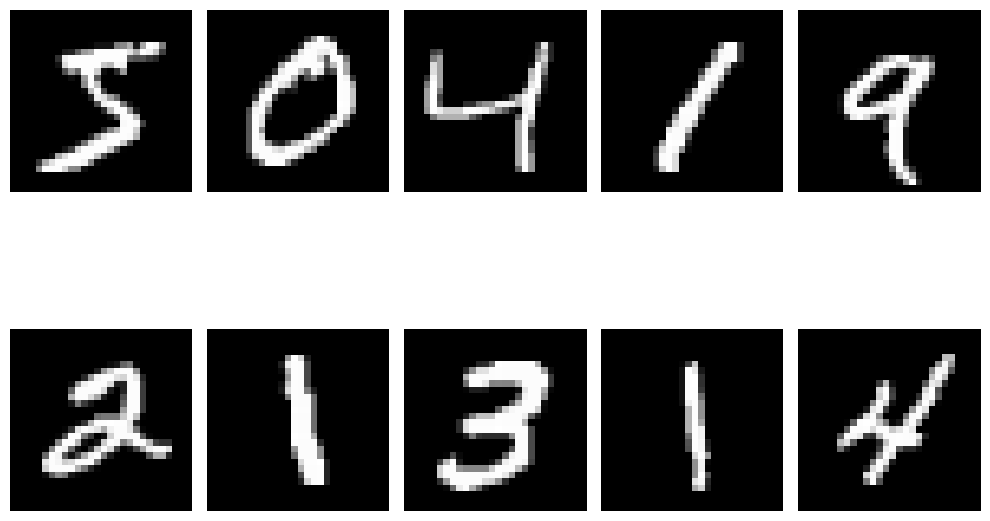

In [21]:
plot_images(train_images[:10,...])

### Calculating Averages
We want to put the images into 10 groups by their labels. There is a number of ways we could do this:
1) Use argsort to sort the labels in ascending order, apply the permutation calculated while sorting to the images, count the number of occurences for each label (with torch.bincount) and split the sorted images accordingly.

2) Generate boolean masks for each label and use them to select the correct images (this is probably the easiest one to implement).

3) Get the indices of all labels with value $i$, then use these indices with array indexing to get the corresponding images.

Choose a method, implement it and use it to get a list of tensors, where the 0th element of the list are the images with label 0 and so on (Could we also stack these tensors to a new tensor with additional dimension 10? If not, why so?)

In [29]:
split_train_images = []

##########################################################################
# TODO: Group the images by their label using one of the methods above.  #
##########################################################################
for i in range(10):
    indices = (train_labels == i).nonzero(as_tuple=True)[0]
    split_train_images.append(train_images[indices])

##########################################################################
#               END OF YOUR CODE                                         #
##########################################################################

assert all([len(a) == l for a,l in zip(split_train_images, [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])])

If your implementation is correct, the image rows should show 0, 1 and 2 accordingly:

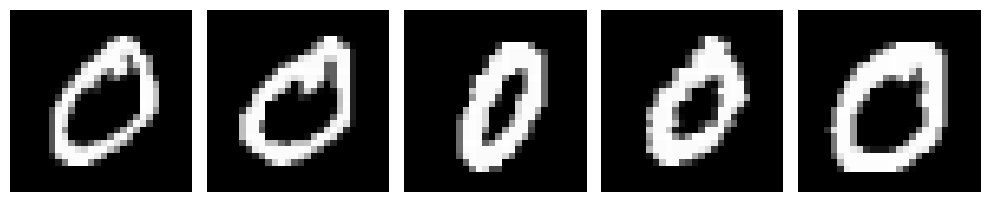

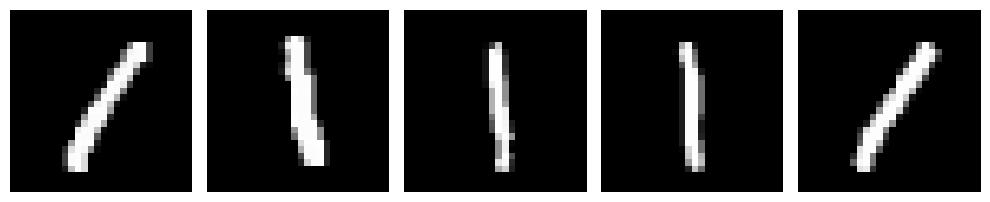

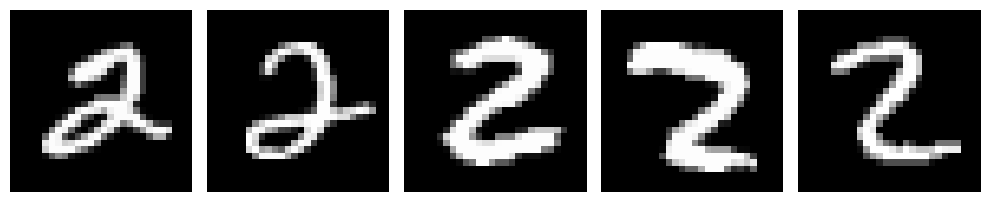

In [28]:
for i in range(3):
    plot_images(split_train_images[i][:5])

In [ ]:
mean_images = None
expected_result = torch.load(f'{control_folder}/mnist_mean_images.pt')

##########################################################################
# TODO: Calculate the mean of each image group in the split train images.#
#       Stack the mean images with torch.stack, so that the              #
#       resulting tensor has shape (10, 28, 28).                         #
##########################################################################
mean_images = torch.empty((0,28,28))
for i in range(10):
    mean_images = torch.cat([mean_images, torch.mean(split_train_images[i], dim=0).unsqueeze(0)], dim=0)
# Replace "pass" statement with your code


##########################################################################
#               END OF YOUR CODE                                         #
##########################################################################

assert torch.allclose(expected_result, mean_images)

Let's take a look at the mean images. They should all be blurry versions of the numbers they represent.

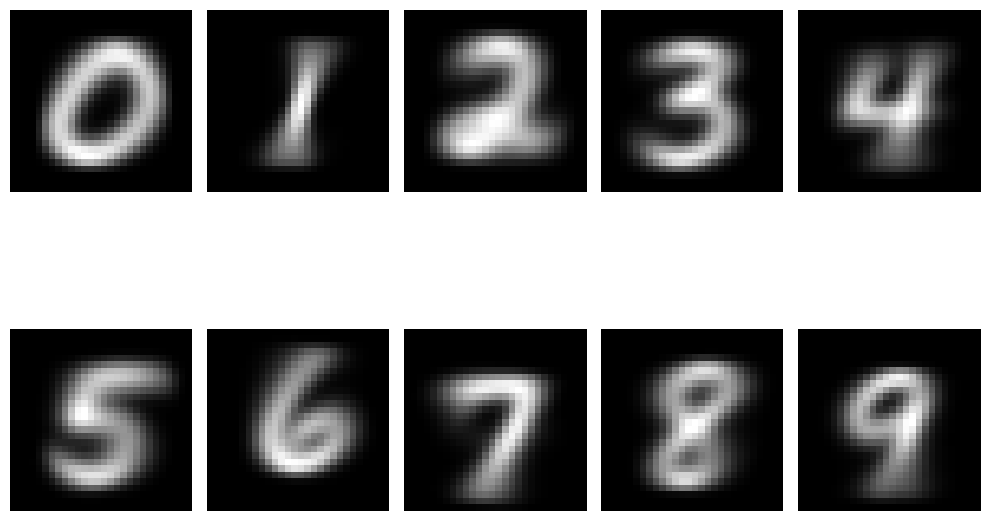

In [34]:
plot_images(mean_images)

We will now use these templates on the validation images and calculate their agreement. In this case, agreement simply means multiplying every pixel in the templates against every pixel from the validation image, then summing them up.
To make sure this is a fair metric, we will first normalize the mean_images, so that they have mean 0 and std 1 individually.

In [39]:
template_images = None
expected_result = torch.load(f'{control_folder}/mnist_normalized_templates.pt')

##########################################################################
# TODO: Calculate mean and std for each mean_image individually.         #
#  You can do this without a loop by choosing the dim argument           #
#  from torch.mean(...) and torch.std(...) correctly.                    #
#  Then, use the mean and  std to normalize the template images.         #
#  keepdim might be helpful here (why?).                                 #
##########################################################################
template_images = torch.empty((0,28,28))
for i in range(10):
    mean = torch.mean(split_train_images[i], dim=-1, keepdim=True)
    std = torch.std(split_train_images[i], dim=-1, keepdim=True)
    normalized_image = (split_train_images[i] - mean)/std
    template_images = torch.cat([template_images, normalized_image], dim=0)
# Replace "pass" statement with your code
pass

##########################################################################
#               END OF YOUR CODE                                         #
##########################################################################

assert torch.allclose(template_images, expected_result)


RuntimeError: The size of tensor a (60000) must match the size of tensor b (10) at non-singleton dimension 0

Now, let's calculate the agreement of the validation images with the templates.

In [ ]:
agreement = None
expected_result = torch.load(f'{control_folder}/mnist_agreement.pt')

##########################################################################
# TODO: Calculate the agreement of the template_images with the          #
#  validation_images as a dot-product. You can use torch.einsum          #
#  to do this effectively in one line.                                   #
#                                                                        #
#  template_images has shape (10, 28, 28),                               #
#  validation_images has shape (N_val, 28, 28) and                       #
#  the output shape should be (N_val, 10).                               #
##########################################################################

# Replace "pass" statement with your code
pass

##########################################################################
#               END OF YOUR CODE                                         #
##########################################################################

print(agreement.shape)
assert torch.allclose(agreement, expected_result)

In [ ]:
validation_guess = None
expected_result = torch.load(f'{control_folder}/mnist_validation_guess.pt')

##########################################################################
# TODO: assign each validation image to the class label with             #
#  the biggest score. You can use torch.argmax for this.                 #
##########################################################################

# Replace "pass" statement with your code
pass

##########################################################################
#               END OF YOUR CODE                                         #
##########################################################################

assert torch.allclose(validation_guess, expected_result)

Last, let's check how good our classification was. Calculate how many times our guess agreed with the label on average.

In [ ]:
accuracy = None
##########################################################################
# TODO: Compare our validation_guess with the validation_labels and      #
#  calculate how many times they were equal on average.                  #
##########################################################################

# Replace "pass" statement with your code
pass

##########################################################################
#               END OF YOUR CODE                                         #
##########################################################################
print(accuracy)


That's an accuracy above 80% and quite a strong baseline to beat. Our method of calculating average images and using them as filters works really well for this use-case. This is in part because the MNIST-Dataset entries are size-normalized and centered, which makes them a good target for this approach.



### Conclusion

This notebook provided a solid introduction to tensor manipulations in PyTorch. Remember, learning is an ongoing process, and even experienced developers continually expand their knowledge base. The skills you practiced here will be valuable as you encounter new challenges.

Next, we'll explore the fundamentals of machine learning by building a feed-forward classifier for handwritten digits. We'll introduce the concept of feature hierarchies, where multiple layers learn to identify increasingly complex patterns. You'll also learn gradient descent – a cornerstone technique for optimizing machine learning models.

Following that, we'll delve into attention mechanisms (you've already seen the basics with scaled dot-product attention!) and apply them to construct a key AlphaFold component: MultiHeadAttention.

Finally, we'll start implementing AlphaFold's core architecture. Congratulations on making it so far! Stay tuned as we embark on this exciting journey.